In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy  as np
import warnings
warnings.filterwarnings("ignore")

# PREPROCESSING

In [2]:
# Import csv file to process on the data
data=pd.read_csv(r"D:\Morcos\BRCA.csv.xls")

# Show Data
data

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# To get all information of dataframe we have, Like no. of coulmns, name of coulmns, non-null cells, and Data type of each column
# Because we need to get a clear data without have Dtype: object we need clearly int. or float data because Machine Learn with numeric data only

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient_ID          334 non-null    object 
 1   Age                 334 non-null    float64
 2   Gender              334 non-null    object 
 3   Protein1            334 non-null    float64
 4   Protein2            334 non-null    float64
 5   Protein3            334 non-null    float64
 6   Protein4            334 non-null    float64
 7   Tumour_Stage        334 non-null    object 
 8   Histology           334 non-null    object 
 9   ER status           334 non-null    object 
 10  PR status           334 non-null    object 
 11  HER2 status         334 non-null    object 
 12  Surgery_type        334 non-null    object 
 13  Date_of_Surgery     334 non-null    object 
 14  Date_of_Last_Visit  317 non-null    object 
 15  Patient_Status      321 non-null    object 
dtypes: float

In [4]:
# To get number of Null(empty) cells

data.isna().sum()

Patient_ID             7
Age                    7
Gender                 7
Protein1               7
Protein2               7
Protein3               7
Protein4               7
Tumour_Stage           7
Histology              7
ER status              7
PR status              7
HER2 status            7
Surgery_type           7
Date_of_Surgery        7
Date_of_Last_Visit    24
Patient_Status        20
dtype: int64

##### we will start Preprocess on all columns have object to change it to numeric

In [5]:
# We need to get all values in column Gender we know it have or carry Male Or Female but we have null cells so we will try to refill all empty cells with logic solutions
# This data talk about Breast Cancer so we search and get...
# ...Although it is rare, men can get breast cancer, but about 1 out of every 100 breast cancers diagnosed is found in a man so, we will assume all nulls cells is FEMALE

data['Gender'].unique()

array(['FEMALE', 'MALE', nan], dtype=object)

In [6]:
# We get number of non-null cells and it will count how many in the one unique column it is FEMALE & MALE

data['Gender'].value_counts()

FEMALE    330
MALE        4
Name: Gender, dtype: int64

In [7]:
# Depend on searches we assume the null cells is FEMALE

data['Gender'].fillna('FEMALE', inplace = True)

In [8]:
# We re-check on fill data we entered it

data['Gender'].value_counts()

FEMALE    337
MALE        4
Name: Gender, dtype: int64

In [9]:
# We re-check on fill data we entered it, but ML know nymeric numbers so we will replace FEMALE and MALE with values

data['Gender'].unique()

array(['FEMALE', 'MALE'], dtype=object)

In [10]:
# We replace Female = 1 and Male = 2 to ML model

data['Gender'].replace({'FEMALE':1,'MALE':2},inplace = True)

In [11]:
# e re-check on fill data we entered it changed or not

data['Gender'].unique()

array([1, 2], dtype=int64)

In [12]:
# we will check it changed in main data or not

data.isna().sum()

Patient_ID             7
Age                    7
Gender                 0
Protein1               7
Protein2               7
Protein3               7
Protein4               7
Tumour_Stage           7
Histology              7
ER status              7
PR status              7
HER2 status            7
Surgery_type           7
Date_of_Surgery        7
Date_of_Last_Visit    24
Patient_Status        20
dtype: int64

So, we solve one column(Gender) we will resolve all empty cells and change it to numeric values

In [13]:
# we need to get all values on column Age to start procees on it

data['Age'].unique()

array([36., 43., 69., 56., 84., 53., 50., 77., 40., 71., 72., 75., 52.,
       41., 37., 59., 62., 74., 87., 45., 55., 79., 47., 61., 68., 49.,
       48., 46., 81., 89., 44., 78., 85., 60., 57., 54., 76., 58., 67.,
       63., 82., 65., 73., 51., 83., 80., 39., 66., 42., 38., 64., 29.,
       32., 70., 90., 35., 88., nan])

In [14]:
# We get number of non-null cells and it will count how many in the one unique column it is lot of Ages

data['Age'].value_counts()

59.0    15
50.0    14
63.0    14
54.0    13
56.0    13
46.0    12
62.0    11
53.0    10
68.0    10
60.0     9
49.0     9
47.0     9
45.0     9
51.0     9
52.0     8
61.0     8
77.0     8
66.0     8
71.0     7
48.0     7
41.0     6
74.0     6
58.0     6
64.0     6
65.0     6
79.0     6
40.0     6
57.0     6
44.0     5
76.0     5
42.0     5
80.0     4
78.0     4
85.0     4
84.0     4
69.0     4
55.0     4
36.0     3
39.0     3
38.0     3
73.0     3
88.0     3
67.0     3
43.0     3
75.0     3
72.0     3
82.0     2
83.0     2
87.0     2
37.0     2
29.0     2
70.0     2
89.0     1
32.0     1
90.0     1
35.0     1
81.0     1
Name: Age, dtype: int64

In [15]:
# So, perfect solution to it is fill null cells with median of all values

data['Age'].fillna(data['Age'].median(), inplace = True)

In [16]:
# Recheck on values

data['Age'].value_counts()

59.0    15
50.0    14
63.0    14
54.0    13
56.0    13
58.0    13
46.0    12
62.0    11
53.0    10
68.0    10
60.0     9
49.0     9
47.0     9
45.0     9
51.0     9
52.0     8
61.0     8
77.0     8
66.0     8
71.0     7
48.0     7
41.0     6
74.0     6
64.0     6
65.0     6
79.0     6
40.0     6
57.0     6
44.0     5
76.0     5
42.0     5
80.0     4
78.0     4
85.0     4
84.0     4
69.0     4
55.0     4
36.0     3
39.0     3
38.0     3
73.0     3
88.0     3
67.0     3
43.0     3
75.0     3
72.0     3
82.0     2
83.0     2
87.0     2
37.0     2
29.0     2
70.0     2
89.0     1
32.0     1
90.0     1
35.0     1
81.0     1
Name: Age, dtype: int64

In [17]:
# Recheck on data to determine if we have null cells or not

data['Age'].unique()

array([36., 43., 69., 56., 84., 53., 50., 77., 40., 71., 72., 75., 52.,
       41., 37., 59., 62., 74., 87., 45., 55., 79., 47., 61., 68., 49.,
       48., 46., 81., 89., 44., 78., 85., 60., 57., 54., 76., 58., 67.,
       63., 82., 65., 73., 51., 83., 80., 39., 66., 42., 38., 64., 29.,
       32., 70., 90., 35., 88.])

In [18]:
# we will check it changed in main data or not


data.isna().sum()

Patient_ID             7
Age                    0
Gender                 0
Protein1               7
Protein2               7
Protein3               7
Protein4               7
Tumour_Stage           7
Histology              7
ER status              7
PR status              7
HER2 status            7
Surgery_type           7
Date_of_Surgery        7
Date_of_Last_Visit    24
Patient_Status        20
dtype: int64

it changed and we resolved the nulls(empty) cells in the data (AGE, and GENDER)

In [19]:
# Re view on data what we have need a solutions

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient_ID          334 non-null    object 
 1   Age                 341 non-null    float64
 2   Gender              341 non-null    int64  
 3   Protein1            334 non-null    float64
 4   Protein2            334 non-null    float64
 5   Protein3            334 non-null    float64
 6   Protein4            334 non-null    float64
 7   Tumour_Stage        334 non-null    object 
 8   Histology           334 non-null    object 
 9   ER status           334 non-null    object 
 10  PR status           334 non-null    object 
 11  HER2 status         334 non-null    object 
 12  Surgery_type        334 non-null    object 
 13  Date_of_Surgery     334 non-null    object 
 14  Date_of_Last_Visit  317 non-null    object 
 15  Patient_Status      321 non-null    object 
dtypes: float

So, we have column Patient_ID it's useless

In [20]:
# We will drop column Patient_ID that not affect on data we have

data.drop(['Patient_ID'],axis = 1,inplace=True)

In [21]:
# Recheck on data again to know what we have have a problem and solve it

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 341 non-null    float64
 1   Gender              341 non-null    int64  
 2   Protein1            334 non-null    float64
 3   Protein2            334 non-null    float64
 4   Protein3            334 non-null    float64
 5   Protein4            334 non-null    float64
 6   Tumour_Stage        334 non-null    object 
 7   Histology           334 non-null    object 
 8   ER status           334 non-null    object 
 9   PR status           334 non-null    object 
 10  HER2 status         334 non-null    object 
 11  Surgery_type        334 non-null    object 
 12  Date_of_Surgery     334 non-null    object 
 13  Date_of_Last_Visit  317 non-null    object 
 14  Patient_Status      321 non-null    object 
dtypes: float64(5), int64(1), object(9)
memory usage: 40.1+ KB

In [22]:
# Check what have null(empty) cells

data.isna().sum()

Age                    0
Gender                 0
Protein1               7
Protein2               7
Protein3               7
Protein4               7
Tumour_Stage           7
Histology              7
ER status              7
PR status              7
HER2 status            7
Surgery_type           7
Date_of_Surgery        7
Date_of_Last_Visit    24
Patient_Status        20
dtype: int64

In [23]:
data['Date_of_Surgery'].unique()

array(['15-Jan-17', '26-Apr-17', '08-Sep-17', '25-Jan-17', '06-May-17',
       '18-Sep-17', '04-Feb-17', '16-May-17', '28-Sep-17', '14-Feb-17',
       '26-May-17', '08-Oct-17', '24-Feb-17', '05-Jun-17', '18-Oct-17',
       '06-Mar-17', '15-Jun-17', '28-Oct-17', '16-Mar-17', '25-Jun-17',
       '07-Nov-17', '26-Mar-17', '17-Nov-17', '05-Apr-17', '27-Nov-17',
       '15-Apr-17', '07-Dec-17', '25-Apr-17', '17-Dec-17', '05-May-17',
       '27-Dec-17', '15-May-17', '06-Jan-18', '25-May-17', '16-Jan-18',
       '04-Jun-17', '26-Jan-18', '14-Jun-17', '05-Feb-18', '24-Jun-17',
       '15-Feb-18', '04-Jul-17', '25-Feb-18', '14-Jul-17', '07-Mar-18',
       '24-Jul-17', '17-Mar-18', '03-Aug-17', '27-Mar-18', '13-Aug-17',
       '06-Apr-18', '23-Aug-17', '16-Apr-18', '02-Sep-17', '26-Apr-18',
       '12-Sep-17', '06-May-18', '22-Sep-17', '16-May-18', '02-Oct-17',
       '26-May-18', '12-Oct-17', '05-Jun-18', '22-Oct-17', '15-Jun-18',
       '01-Nov-17', '25-Jun-18', '11-Nov-17', '05-Jul-18', '21-N

In [24]:
data['Date_of_Last_Visit'].unique()

array(['19-Jun-17', '09-Nov-18', '09-Jun-18', '12-Jul-17', '27-Jun-19',
       '15-Nov-21', '07-Feb-18', nan, '28-Sep-18', '15-Dec-17',
       '19-Dec-17', '13-Sep-18', '05-Apr-17', '02-Mar-20', '28-Apr-20',
       '09-Aug-19', '24-Oct-18', '22-Jul-18', '20-Oct-19', '23-Dec-19',
       '28-Nov-17', '23-Sep-20', '15-Aug-18', '20-Jun-17', '11-Jan-18',
       '10-Apr-18', '25-Jan-18', '24-May-18', '25-Jun-18', '26-Jun-22',
       '18-Jul-18', '23-Feb-18', '21-Jun-17', '13-Apr-20', '16-May-18',
       '01-Nov-17', '02-Dec-18', '10-Feb-18', '15-Jan-18', '10-Jan-18',
       '23-Jan-19', '27-Feb-18', '10-Feb-20', '12-Mar-18', '12-Sep-20',
       '03-May-26', '06-Oct-19', '24-Jul-17', '15-Aug-19', '05-Feb-21',
       '23-Mar-20', '11-Mar-18', '27-Aug-18', '15-Oct-20', '14-Oct-20',
       '17-Oct-17', '11-Oct-18', '23-Jun-19', '18-Mar-18', '02-May-20',
       '06-Feb-19', '13-Aug-18', '09-Oct-20', '28-Feb-19', '17-Nov-20',
       '19-Oct-20', '12-Aug-18', '21-Apr-20', '25-Jan-19', '04-May-18',


After what we saw, we have column Date_of_Surgery and Date_of_Last_Visit have problem and it is: the data not numeric value

So, we will try to solve that problem by split data with '-' to get 3 values index to re fill it again in dataframe

In [25]:
# It is one of solution if we have data numeric and we need to change the format example: data we have:23-04-01 change format to dd/mm/yyyy it will be 23/04/2001


#data['Date_of_Surgery'] = pd.to_datetime(data['Date_of_Surgery'], format = '%dd-%mm-%yy')

In [26]:
# We will split the data in column by '-' and expand it


# For column Date_of_Surgery
df1 = data["Date_of_Surgery"].str.split("-", n = 2, expand = True)

# For coulmn Date_of_Last_Visit
df2 = data["Date_of_Last_Visit"].str.split("-", n = 2, expand = True)

In [27]:
# Make new columns of splited data we have in day, month, and year


# For Date_of_Surgery

data["Day_of_Surgery"] = df1[0]
 
data["Month_of_Surgery"]= df1[1]

data["Year_of_Surgery"] = df1[2]


# For Date_of_Last_Visit

data["Day_of_Last_Visit"] = df2[0]
 
data["Month_of_Last_Visit"]= df2[1]

data["Year_of_Last_Visit"] = df2[2]

In [28]:
# Show data to look what changed?

data.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,...,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status,Day_of_Surgery,Month_of_Surgery,Year_of_Surgery,Day_of_Last_Visit,Month_of_Last_Visit,Year_of_Last_Visit
0,36.0,1,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,...,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive,15,Jan,17,19,Jun,17
1,43.0,1,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,...,Lumpectomy,26-Apr-17,09-Nov-18,Dead,26,Apr,17,09,Nov,18
2,69.0,1,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,...,Other,08-Sep-17,09-Jun-18,Alive,08,Sep,17,09,Jun,18
3,56.0,1,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,...,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive,25,Jan,17,12,Jul,17
4,56.0,1,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,...,Other,06-May-17,27-Jun-19,Dead,06,May,17,27,Jun,19


In [29]:
# we have in Month_of_Surgery strings values so, we need to know all unique values

data["Month_of_Surgery"].unique()

array(['Jan', 'Apr', 'Sep', 'May', 'Feb', 'Oct', 'Jun', 'Mar', 'Nov',
       'Dec', 'Jul', 'Aug', nan], dtype=object)

In [30]:
# we have in Month_of_Surgery strings values of month so we will replace it with numeric data

data['Month_of_Surgery'].replace({'Jan':1,'Apr':4,'Sep':9,'May':5,'Feb':2,'Oct':10,'Mar':3,'Jun':6,'Nov':11,'Dec':12,'Jul':7,'Aug':8},inplace = True)
data['Month_of_Last_Visit'].replace({'Jan':1,'Apr':4,'Sep':9,'May':5,'Feb':2,'Oct':10,'Mar':3,'Jun':6,'Nov':11,'Dec':12,'Jul':7,'Aug':8},inplace = True)

In [31]:
# Check if that changed or not

data["Month_of_Surgery"].unique()

array([ 1.,  4.,  9.,  5.,  2., 10.,  6.,  3., 11., 12.,  7.,  8., nan])

In [32]:
# Check if that changed or not

data["Month_of_Last_Visit"].unique()

array([ 6., 11.,  7.,  2., nan,  9., 12.,  4.,  3.,  8., 10.,  1.,  5.])

In [33]:
# when it splited it stored as strings but it intger number so we changed it to numeric data

data['Day_of_Surgery'] = pd.to_numeric(data['Day_of_Surgery'])
data['Day_of_Last_Visit'] = pd.to_numeric(data['Day_of_Last_Visit'])

# I tried to change it to integer but i didn't know solve of that problem\

#data['Day_of_Surgery'] = data['Day_of_Surgery'].astype(int)


In [34]:
# Also like before steps

data['Year_of_Surgery'] = pd.to_numeric(data['Year_of_Surgery'])
data['Year_of_Last_Visit'] = pd.to_numeric(data['Year_of_Last_Visit'])


In [35]:
# We replace that two column to day, month, and year so we now can drop it

data.drop(columns =["Date_of_Surgery"], inplace = True)
data.drop(columns =["Date_of_Last_Visit"], inplace = True)

In [36]:
# Check data

data.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Patient_Status,Day_of_Surgery,Month_of_Surgery,Year_of_Surgery,Day_of_Last_Visit,Month_of_Last_Visit,Year_of_Last_Visit
0,36.0,1,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,Alive,15.0,1.0,17.0,19.0,6.0,17.0
1,43.0,1,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,Dead,26.0,4.0,17.0,9.0,11.0,18.0
2,69.0,1,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,Alive,8.0,9.0,17.0,9.0,6.0,18.0
3,56.0,1,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,Alive,25.0,1.0,17.0,12.0,7.0,17.0
4,56.0,1,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,Dead,6.0,5.0,17.0,27.0,6.0,19.0


In [37]:
# Check data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  341 non-null    float64
 1   Gender               341 non-null    int64  
 2   Protein1             334 non-null    float64
 3   Protein2             334 non-null    float64
 4   Protein3             334 non-null    float64
 5   Protein4             334 non-null    float64
 6   Tumour_Stage         334 non-null    object 
 7   Histology            334 non-null    object 
 8   ER status            334 non-null    object 
 9   PR status            334 non-null    object 
 10  HER2 status          334 non-null    object 
 11  Surgery_type         334 non-null    object 
 12  Patient_Status       321 non-null    object 
 13  Day_of_Surgery       334 non-null    float64
 14  Month_of_Surgery     334 non-null    float64
 15  Year_of_Surgery      334 non-null    flo

In [38]:
# We need to Know unique values to write it in replace

data['Patient_Status'].unique()

array(['Alive', 'Dead', nan], dtype=object)

In [39]:
# we need to change data to numeric so we replace data with numeric values not object

data['Patient_Status'].replace({'Alive':1,'Dead':0},inplace = True)

In [40]:
# Check data

data['Patient_Status'].unique()

array([ 1.,  0., nan])

In [41]:
# Check data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  341 non-null    float64
 1   Gender               341 non-null    int64  
 2   Protein1             334 non-null    float64
 3   Protein2             334 non-null    float64
 4   Protein3             334 non-null    float64
 5   Protein4             334 non-null    float64
 6   Tumour_Stage         334 non-null    object 
 7   Histology            334 non-null    object 
 8   ER status            334 non-null    object 
 9   PR status            334 non-null    object 
 10  HER2 status          334 non-null    object 
 11  Surgery_type         334 non-null    object 
 12  Patient_Status       321 non-null    float64
 13  Day_of_Surgery       334 non-null    float64
 14  Month_of_Surgery     334 non-null    float64
 15  Year_of_Surgery      334 non-null    flo

In [42]:
# Check data again

data.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Patient_Status,Day_of_Surgery,Month_of_Surgery,Year_of_Surgery,Day_of_Last_Visit,Month_of_Last_Visit,Year_of_Last_Visit
0,36.0,1,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,1.0,15.0,1.0,17.0,19.0,6.0,17.0
1,43.0,1,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,0.0,26.0,4.0,17.0,9.0,11.0,18.0
2,69.0,1,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,1.0,8.0,9.0,17.0,9.0,6.0,18.0
3,56.0,1,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,1.0,25.0,1.0,17.0,12.0,7.0,17.0
4,56.0,1,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,0.0,6.0,5.0,17.0,27.0,6.0,19.0


We need to know more on column(data) we had it we searched on it ... ER&PR&HR will be:

---**ER-positive (ER+): Cancers that have estrogen receptors (ER)**

---**PR-positive (PR+): Cancers that have progesterone receptors (PR)**

---**Hormone receptor-positive (HR+): Cancers that have one or both types of these receptors.**

**IF ER = + & PR = + & HR = - it refers to that MAYbe have Cancer or not**

**but, if ER&PR&HR = + she have a cancer**

In [43]:
# Get unique values to check if anyone have negative or positive

data['ER status'].unique()

array(['Positive', nan], dtype=object)

In [44]:
# Replace it with numeric data

data['ER status'].replace({'Positive':1},inplace = True)

In [45]:
# Check changed

data['ER status'].unique()

array([ 1., nan])

In [46]:
# Get unique values to check if anyone have negative or positive

data['PR status'].unique()

array(['Positive', nan], dtype=object)

In [47]:
# Replace it with numeric data

data['PR status'].replace({'Positive':1},inplace = True)

In [48]:
# Check changed

data['PR status'].unique()

array([ 1., nan])

In [49]:
# Get unique values to check if anyone have negative or positive

data['HER2 status'].unique()

array(['Negative', 'Positive', nan], dtype=object)

In [50]:
# Replace it with numeric data

data['HER2 status'].replace({'Positive':1,'Negative':0},inplace = True)

In [51]:
# Check changed

data['HER2 status'].unique()

array([ 0.,  1., nan])

In [52]:
# Check data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  341 non-null    float64
 1   Gender               341 non-null    int64  
 2   Protein1             334 non-null    float64
 3   Protein2             334 non-null    float64
 4   Protein3             334 non-null    float64
 5   Protein4             334 non-null    float64
 6   Tumour_Stage         334 non-null    object 
 7   Histology            334 non-null    object 
 8   ER status            334 non-null    float64
 9   PR status            334 non-null    float64
 10  HER2 status          334 non-null    float64
 11  Surgery_type         334 non-null    object 
 12  Patient_Status       321 non-null    float64
 13  Day_of_Surgery       334 non-null    float64
 14  Month_of_Surgery     334 non-null    float64
 15  Year_of_Surgery      334 non-null    flo

In [53]:
# Check data

data.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Patient_Status,Day_of_Surgery,Month_of_Surgery,Year_of_Surgery,Day_of_Last_Visit,Month_of_Last_Visit,Year_of_Last_Visit
0,36.0,1,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,1.0,1.0,0.0,Modified Radical Mastectomy,1.0,15.0,1.0,17.0,19.0,6.0,17.0
1,43.0,1,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,1.0,1.0,0.0,Lumpectomy,0.0,26.0,4.0,17.0,9.0,11.0,18.0
2,69.0,1,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,1.0,1.0,0.0,Other,1.0,8.0,9.0,17.0,9.0,6.0,18.0
3,56.0,1,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,1.0,1.0,0.0,Modified Radical Mastectomy,1.0,25.0,1.0,17.0,12.0,7.0,17.0
4,56.0,1,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,1.0,1.0,0.0,Other,0.0,6.0,5.0,17.0,27.0,6.0,19.0


In [54]:
# Get unique values to check stage of cancer

data['Tumour_Stage'].unique()

array(['III', 'II', 'I', nan], dtype=object)

In [55]:
## Replace it with numeric data

data['Tumour_Stage'].replace({'III':3,'II':2,'I':1},inplace = True)

In [56]:
# Check changed

data['Tumour_Stage'].unique()

array([ 3.,  2.,  1., nan])

In [57]:
# Check data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  341 non-null    float64
 1   Gender               341 non-null    int64  
 2   Protein1             334 non-null    float64
 3   Protein2             334 non-null    float64
 4   Protein3             334 non-null    float64
 5   Protein4             334 non-null    float64
 6   Tumour_Stage         334 non-null    float64
 7   Histology            334 non-null    object 
 8   ER status            334 non-null    float64
 9   PR status            334 non-null    float64
 10  HER2 status          334 non-null    float64
 11  Surgery_type         334 non-null    object 
 12  Patient_Status       321 non-null    float64
 13  Day_of_Surgery       334 non-null    float64
 14  Month_of_Surgery     334 non-null    float64
 15  Year_of_Surgery      334 non-null    flo

###### After looked on data we have only TWO columns have strings values (object dtype)(Surgerytype - Histology) so we need to solve it to be numeric values so we will get unique values
###### if it many value we will use Encoder to Encode the data to numeric values give high value weight highest of rest of values

In [58]:
data['Surgery_type'].unique()

array(['Modified Radical Mastectomy', 'Lumpectomy', 'Other',
       'Simple Mastectomy', nan], dtype=object)

In [59]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'Surgery_type'
data['Surgery_type']= label_encoder.fit_transform(data['Surgery_type'])
  
data['Surgery_type'].unique()

array([1, 0, 2, 3, 4])

In [60]:
data['Histology'].unique()

array(['Infiltrating Ductal Carcinoma', 'Mucinous Carcinoma',
       'Infiltrating Lobular Carcinoma', nan], dtype=object)

In [61]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'Histology'
data['Histology']= label_encoder.fit_transform(data['Histology'])
  
data['Histology'].unique()

array([0, 2, 1, 3])

In [62]:
data.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Patient_Status,Day_of_Surgery,Month_of_Surgery,Year_of_Surgery,Day_of_Last_Visit,Month_of_Last_Visit,Year_of_Last_Visit
0,36.0,1,0.080353,0.42638,0.54715,0.273680,3.0,0,1.0,1.0,0.0,1,1.0,15.0,1.0,17.0,19.0,6.0,17.0
1,43.0,1,-0.420320,0.57807,0.61447,-0.031505,2.0,2,1.0,1.0,0.0,0,0.0,26.0,4.0,17.0,9.0,11.0,18.0
2,69.0,1,0.213980,1.31140,-0.32747,-0.234260,3.0,0,1.0,1.0,0.0,2,1.0,8.0,9.0,17.0,9.0,6.0,18.0
3,56.0,1,0.345090,-0.21147,-0.19304,0.124270,2.0,0,1.0,1.0,0.0,1,1.0,25.0,1.0,17.0,12.0,7.0,17.0
4,56.0,1,0.221550,1.90680,0.52045,-0.311990,2.0,0,1.0,1.0,0.0,2,0.0,6.0,5.0,17.0,27.0,6.0,19.0


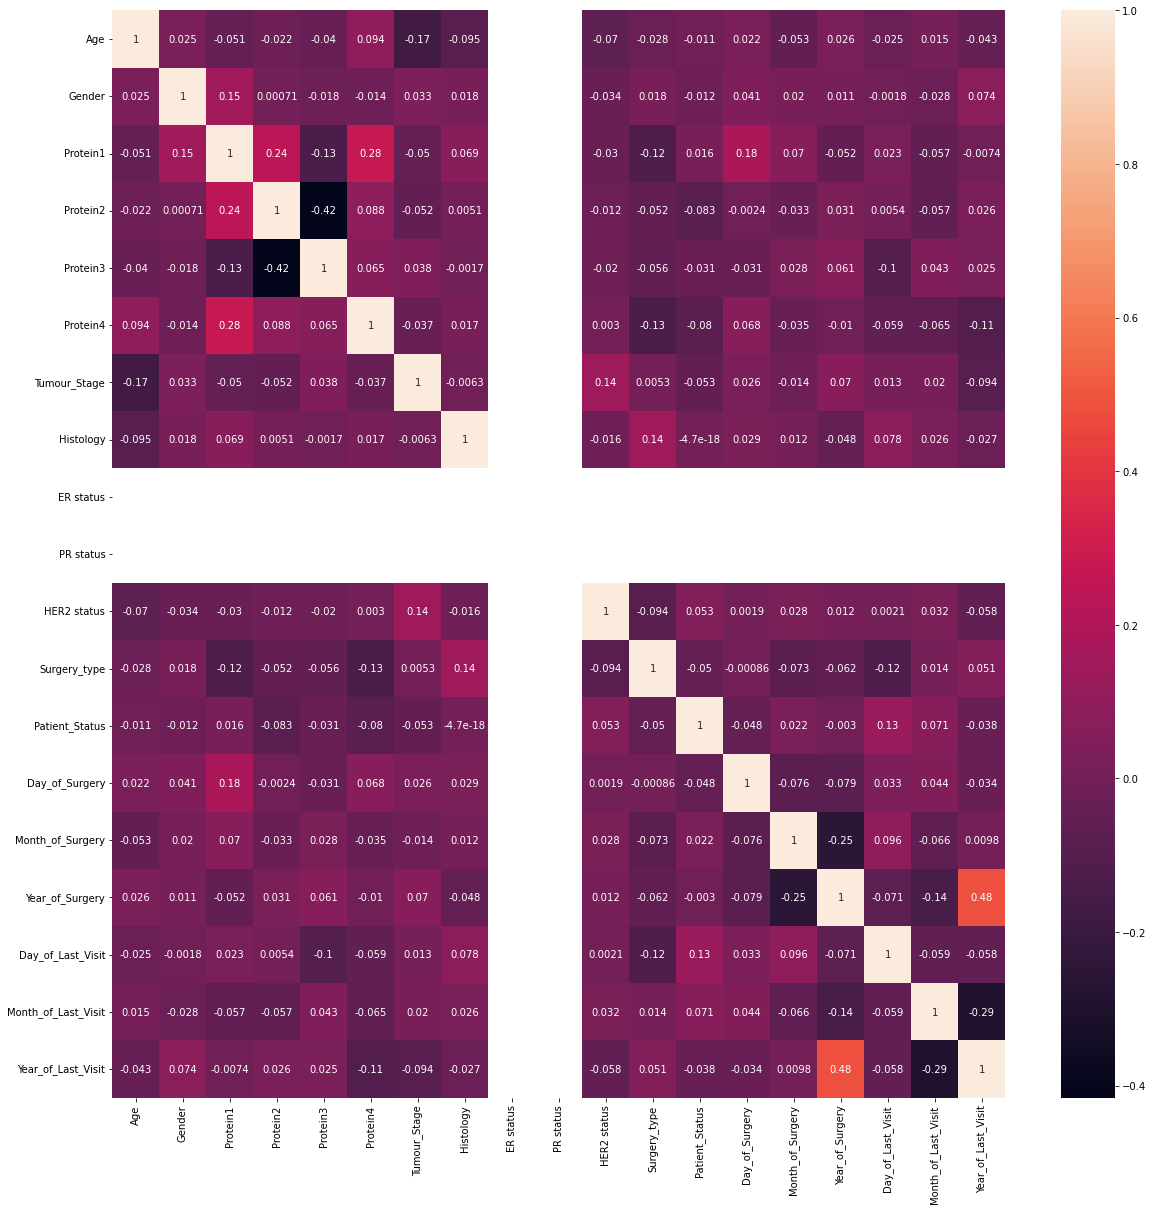

In [63]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True)
plt.show()

###### We have Two column if fixed values so it will be useless in data so we can drop it

In [64]:
# Fixed Columns we will drop it

data.drop(columns =["ER status"], inplace = True)
data.drop(columns =["PR status"], inplace = True)

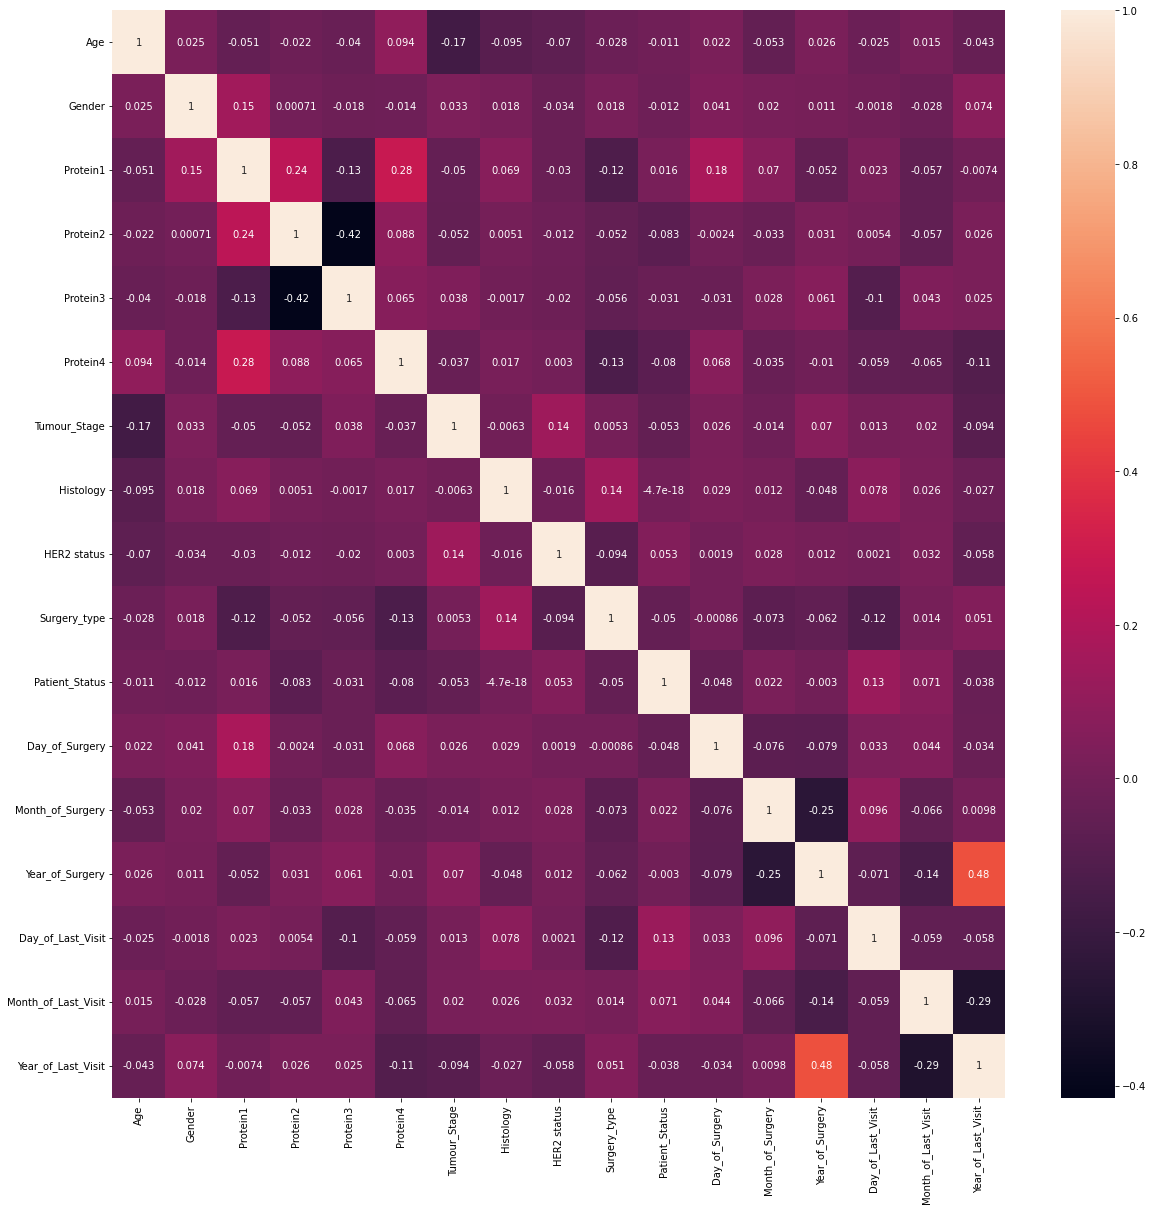

In [65]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [66]:
# Check data if we have any object type

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  341 non-null    float64
 1   Gender               341 non-null    int64  
 2   Protein1             334 non-null    float64
 3   Protein2             334 non-null    float64
 4   Protein3             334 non-null    float64
 5   Protein4             334 non-null    float64
 6   Tumour_Stage         334 non-null    float64
 7   Histology            341 non-null    int32  
 8   HER2 status          334 non-null    float64
 9   Surgery_type         341 non-null    int32  
 10  Patient_Status       321 non-null    float64
 11  Day_of_Surgery       334 non-null    float64
 12  Month_of_Surgery     334 non-null    float64
 13  Year_of_Surgery      334 non-null    float64
 14  Day_of_Last_Visit    317 non-null    float64
 15  Month_of_Last_Visit  317 non-null    flo

In [67]:
# Show data

data.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type,Patient_Status,Day_of_Surgery,Month_of_Surgery,Year_of_Surgery,Day_of_Last_Visit,Month_of_Last_Visit,Year_of_Last_Visit
0,36.0,1,0.080353,0.42638,0.54715,0.273680,3.0,0,0.0,1,1.0,15.0,1.0,17.0,19.0,6.0,17.0
1,43.0,1,-0.420320,0.57807,0.61447,-0.031505,2.0,2,0.0,0,0.0,26.0,4.0,17.0,9.0,11.0,18.0
2,69.0,1,0.213980,1.31140,-0.32747,-0.234260,3.0,0,0.0,2,1.0,8.0,9.0,17.0,9.0,6.0,18.0
3,56.0,1,0.345090,-0.21147,-0.19304,0.124270,2.0,0,0.0,1,1.0,25.0,1.0,17.0,12.0,7.0,17.0
4,56.0,1,0.221550,1.90680,0.52045,-0.311990,2.0,0,0.0,2,0.0,6.0,5.0,17.0,27.0,6.0,19.0


In [68]:
# Check the null cells

data.isna().sum()

Age                     0
Gender                  0
Protein1                7
Protein2                7
Protein3                7
Protein4                7
Tumour_Stage            7
Histology               0
HER2 status             7
Surgery_type            0
Patient_Status         20
Day_of_Surgery          7
Month_of_Surgery        7
Year_of_Surgery         7
Day_of_Last_Visit      24
Month_of_Last_Visit    24
Year_of_Last_Visit     24
dtype: int64

**This Data is Medical one so, it more senstive to predict any null(empty) cells but it also not enough to fit model on it so we will get high error like (overfitting)**

**First we will drop null(empty) cells and drop duplicated data if it few**

**Second we can solve it by: Get more data (OR) Use model low in complexity**

**So we can not get more data so we will low complexity model like linear regression**

In [69]:
# Get how many duplicated values

data.duplicated().sum()

6

In [70]:
# Drop duplicated values

data.drop_duplicates(inplace = True)

In [71]:
# Drop all null(empty) cells
data.dropna(inplace = True)

In [72]:
data.isna().sum()

Age                    0
Gender                 0
Protein1               0
Protein2               0
Protein3               0
Protein4               0
Tumour_Stage           0
Histology              0
HER2 status            0
Surgery_type           0
Patient_Status         0
Day_of_Surgery         0
Month_of_Surgery       0
Year_of_Surgery        0
Day_of_Last_Visit      0
Month_of_Last_Visit    0
Year_of_Last_Visit     0
dtype: int64

# Modeling

### Linear Regression model

In [73]:
data.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type,Patient_Status,Day_of_Surgery,Month_of_Surgery,Year_of_Surgery,Day_of_Last_Visit,Month_of_Last_Visit,Year_of_Last_Visit
0,36.0,1,0.080353,0.42638,0.54715,0.273680,3.0,0,0.0,1,1.0,15.0,1.0,17.0,19.0,6.0,17.0
1,43.0,1,-0.420320,0.57807,0.61447,-0.031505,2.0,2,0.0,0,0.0,26.0,4.0,17.0,9.0,11.0,18.0
2,69.0,1,0.213980,1.31140,-0.32747,-0.234260,3.0,0,0.0,2,1.0,8.0,9.0,17.0,9.0,6.0,18.0
3,56.0,1,0.345090,-0.21147,-0.19304,0.124270,2.0,0,0.0,1,1.0,25.0,1.0,17.0,12.0,7.0,17.0
4,56.0,1,0.221550,1.90680,0.52045,-0.311990,2.0,0,0.0,2,0.0,6.0,5.0,17.0,27.0,6.0,19.0


In [74]:
from sklearn.model_selection import train_test_split

x = data.loc[:,data.columns != 'Patient_Status'].values
y = data.loc[:,'Patient_Status'].values


train_x,test_x,train_y,test_y = train_test_split(x,y,test_size = 0.3)

In [75]:
from sklearn.preprocessing import StandardScaler
sd=StandardScaler()
train_x=sd.fit_transform(train_x)
test_x=sd.transform(test_x)

In [76]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [77]:
model.fit(train_x,train_y)

LinearRegression()

In [78]:
y_pred=model.predict(test_x)

In [79]:
from sklearn.metrics import mean_squared_error,r2_score
print("MSE : ",mean_squared_error(y_pred,test_y))
print("r2-score : ",r2_score(y_pred,test_y))

MSE :  0.2033940566016509
r2-score :  -20.289290417977366


### Classification Model

In [ ]:
y_pred = model.predict(test_x)

In [ ]:
# evaluate

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_pred,test_y))

In [ ]:
from sklearn.metrics import recall_score, precision_score,accuracy_score,f1_score
print('Acc.     = ',accuracy_score(test_y,y_pred))
print('Recall   = ',recall_score(test_y,y_pred))
print('prec.    = ',precision_score(test_y,y_pred))
print('F1_score = ',f1_score(test_y,y_pred))

In [ ]:
y_pred = model.predict(train_x)

In [ ]:
from sklearn.metrics import recall_score, precision_score,accuracy_score,f1_score
print('Acc.     = ',accuracy_score(train_y,y_pred))
print('Recall   = ',recall_score(train_y,y_pred))
print('prec.    = ',precision_score(train_y,y_pred))
print('F1_score = ',f1_score(train_y,y_pred))